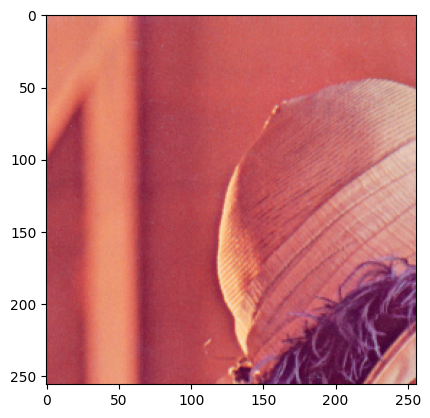

In [44]:
import cv2
import sys
import os
import matplotlib.pyplot as plt

IMG_PATH = "data" 
img =cv2.imread(os.path.join(IMG_PATH, "lena.png"))
#cv2 BGR , plt RGB -> convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

#image crop upper left half using numpy slicing
img_crop = img_rgb[:256, :256]  #image size 512x512
plt.imshow(img_crop)
plt.show()

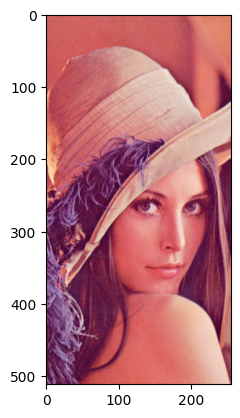

In [43]:
#center half crop
img_crop = img_rgb[0:512, 128:384] #x 위 아래, y 좌 우
plt.imshow(img_crop)
plt.show()

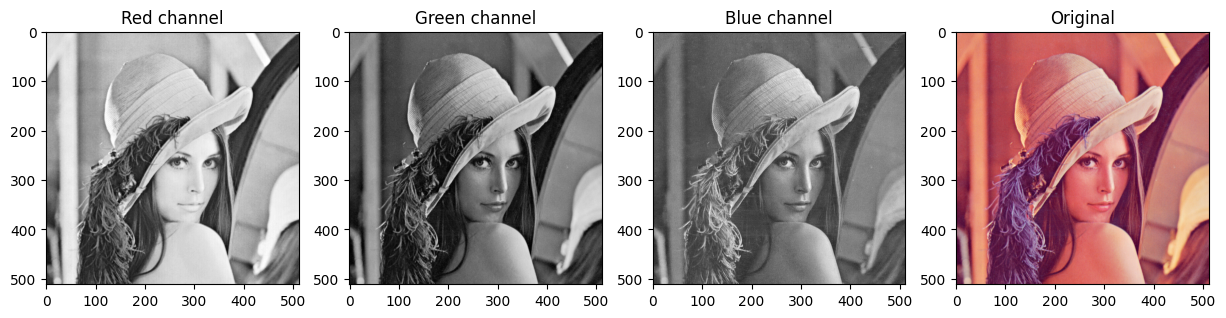

In [42]:
#RGB channel split
r, g, b = cv2.split(img_rgb)
#subplot 으로 한번에 표시
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.title("Red channel")
plt.imshow(r, cmap="gray")
plt.subplot(142)
plt.title("Green channel")
plt.imshow(g, cmap="gray")
plt.subplot(143)
plt.title("Blue channel")
plt.imshow(b, cmap="gray")
plt.subplot(144)
plt.title("Original")
plt.imshow(img_rgb,cmap="gray")

plt.show()
#각 channel에서 어떻게 표현되는지 비교하면서 확인해보기

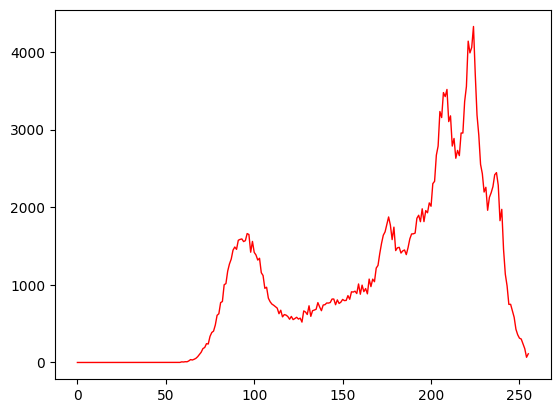

In [41]:
#히스토그램을 통한 이진화
#이진화를 사용하는 이유 
#Grayscale 영상 -> Thresholding -> Binary 영상
import cv2
import matplotlib.pyplot as plt

img =cv2.imread(os.path.join(IMG_PATH, "lena.png"))
red_hist = cv2.calcHist([img], [2], None, [256], [0, 256]) #cv2 BGR -> R [2]
plt.plot(red_hist, color='r',linewidth=1)
plt.show()

Otus's Threshold:  161.0


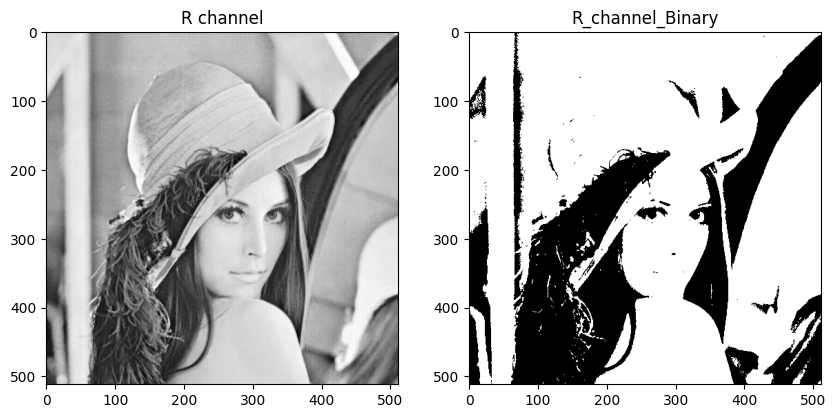

In [40]:
#오츄 알고리즘 -> Thresholding value를 최적화 문제로 풀어서 목적함수 J 를 계산하여 최소인 명암값을 최적값으로 구하는 것

import cv2
import sys

img = cv2.imread(os.path.join(IMG_PATH, "lena.png"))

Threshold, binary_img = cv2.threshold(img[:,:,2], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) #오츄 알고리즘을 사용한 이진화
print("Otus's Threshold: ", Threshold) # R_channel의 threshold 값


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("R channel")
plt.imshow(img[:,:,2], cmap="gray")
plt.subplot(122)
plt.title("R_channel_Binary")
plt.imshow(binary_img, cmap="gray") #R channel을 이용한 이진화 이미지 출력
plt.show()

(176, 640, 4)


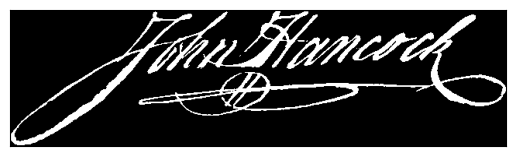

In [38]:
#연결 요소, 모폴로지
#4-연결성, 8-연결성
#모폴로지 연산 -> 팽창, 침식, 열림, 닫힘
#각 모폴로지 연산이 어떻게 진행되는지 과정 확인하기
import cv2
import numpy as np
import matplotlib.pyplot as plt 

img = cv2.imread(os.path.join(IMG_PATH, "JohnHancockSignature.png"), cv2.IMREAD_UNCHANGED) #png ->  UNCHANGES -> 4 channel로 읽어옴 (RGBA)
print(img.shape) # (height, width, channel) , Channel 4 -> RGBA
Threshold, binary_img = cv2.threshold(img[:,:,3], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(binary_img, cmap="gray"),plt.xticks([]),plt.yticks([])
plt.show()

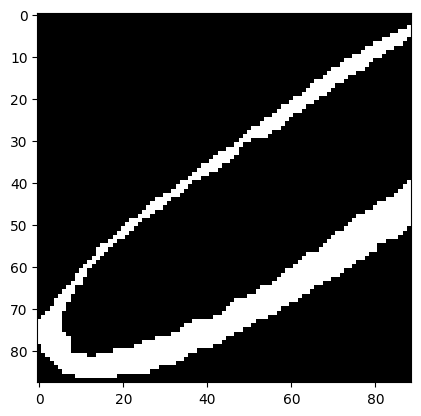

In [39]:
bin = binary_img[binary_img.shape[0]//2:binary_img.shape[0], 0:binary_img.shape[0]//2+1]
plt.imshow(bin,cmap='gray')
plt.show()

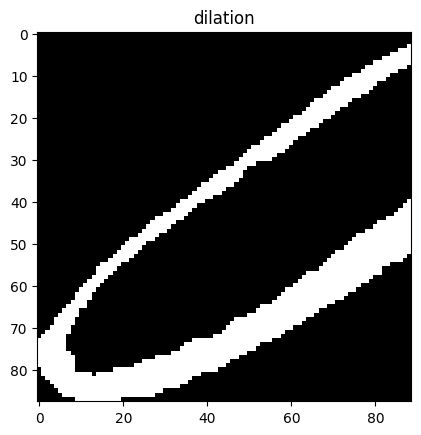

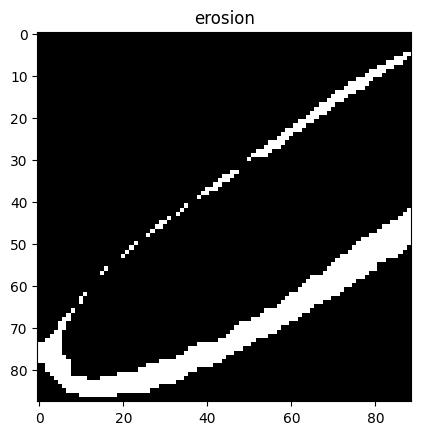

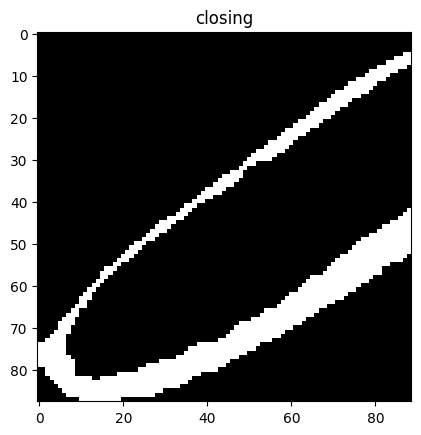

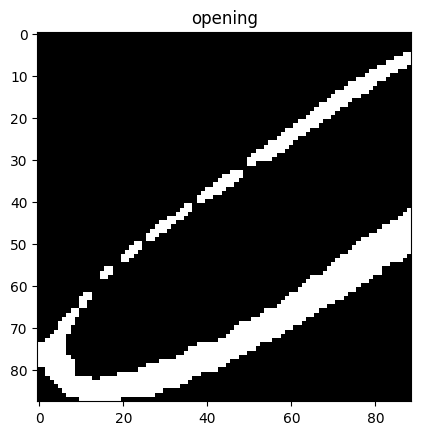

In [57]:
#구조요소 se
se = np.ones((2,2), np.uint8)

bin_dilation = cv2.dilate(bin, se, iterations=1)
plt.title("dilation")
plt.imshow(bin_dilation, cmap='gray')
plt.show()

bin_erosion = cv2.erode(bin, se, iterations=1)
plt.title("erosion")
plt.imshow(bin_erosion, cmap='gray')
plt.show()

bin_closing = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, se)
plt.title("closing")
plt.imshow(bin_closing, cmap='gray')
plt.show()

bin_opening = cv2.morphologyEx(bin, cv2.MORPH_OPEN, se)
plt.title("opening")
plt.imshow(bin_opening, cmap='gray')
plt.show()




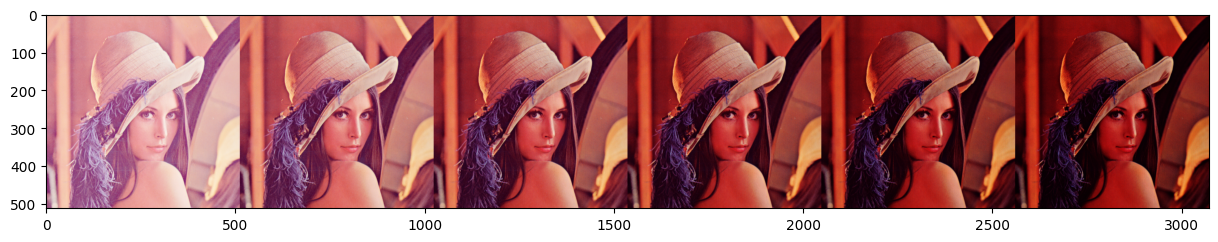

In [61]:
#감마 보정 , lena를 이요해서 실습
#gamma 값은 0.5부터 3.0 까지 0.5씩 증가시키면서 이미지를 출력해보기
#hstack으로 합치기
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(os.path.join(IMG_PATH, "lena.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gamma = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
gamma_img = [np.power(img/255., g) for g in gamma]
#hstack으로 이미지를 합치기
result = np.hstack(gamma_img)
plt.figure(figsize=(15,5))
plt.imshow(result)
plt.show()

#왜 그런지 감마 곡선 보여주면서 설명해주기 contrast


